In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, concatenate
# 構築済みネットワーク
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model

In [0]:
   def concat_model(input_shape1, input_shape2, ratio, classes):
        input1 = Input(shape=input_shape1)
        img_base_model = VGG16(include_top=False, weights='imagenet', input_shape=input1.shape[1:])(input1)
        img_x = GlobalAveragePooling2D()(img_base_model)
        img_len = img_x.shape[1]
        par_len = int(ratio * img_len)

        input2 = Input(shape=input_shape2)
        par_x = Dense(par_len, kernel_initializer="he_normal")(input2)
        x = concatenate([img_x, par_x], axis=-1)
        x = Dense(128, kernel_initializer='he_normal')(x)
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        outputs = Dense(classes, kernel_initializer='he_normal',activation='softmax')(x)
        model = Model(inputs=[input1, input2], outputs=outputs)
        return model

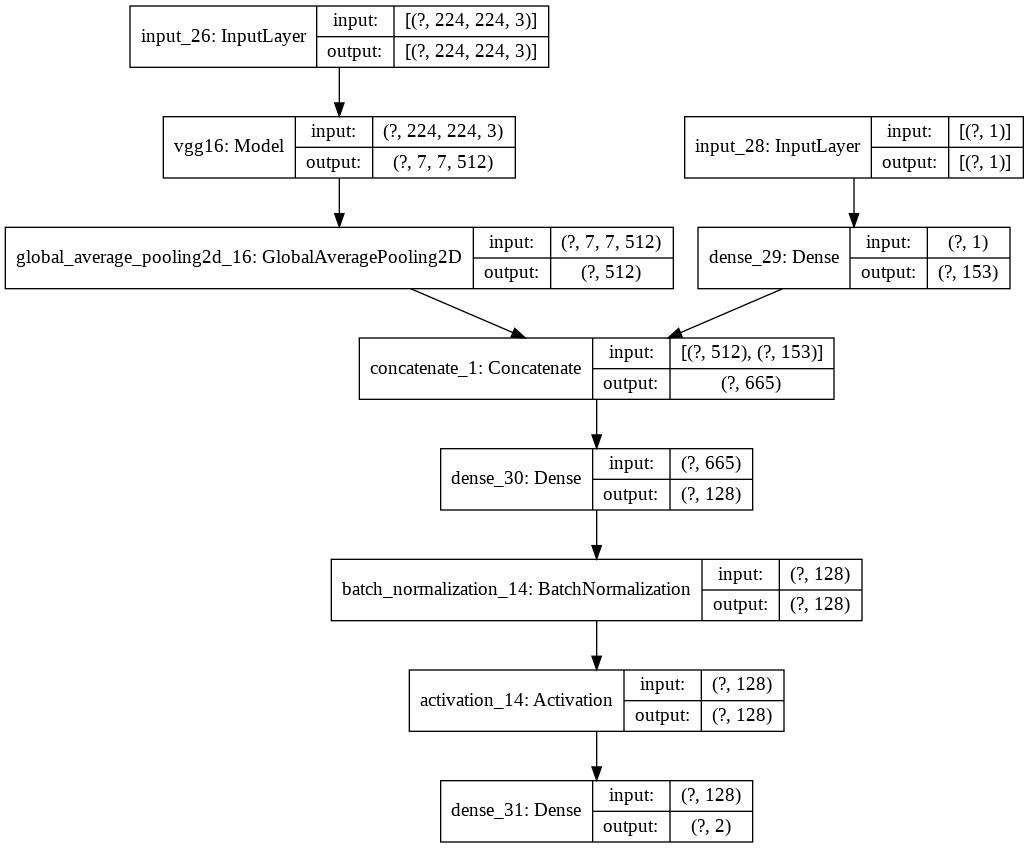

In [47]:
model = concat_model((224, 224, 3), (1), 0.3, 2)
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=False)